# MNIST 이미지 인식

## 데이터 로드

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# !pip install tensorflow
# !pip install keras

In [3]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models

## MNIST 이미지 확인

11493376/11490434 [==============================] - 0s 0us/step


<function matplotlib.pyplot.show>

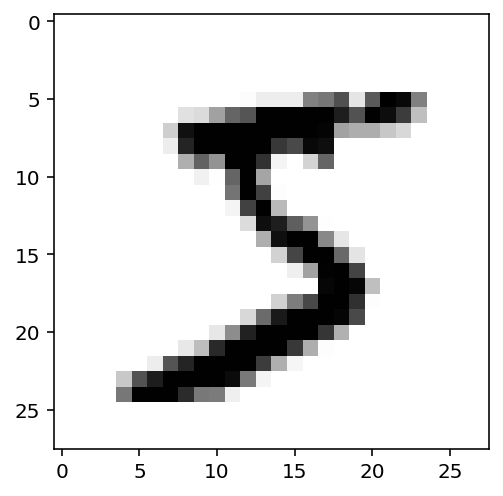

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels[:3]

array([5, 0, 4], dtype=uint8)

## MLP 입력 전처리
- MLP는 1차원 텐서 즉 벡터를 입력으로 사용한다
- 목적 변수는 원 핫 인코딩을 한다. to_categorical를 사용한다

In [7]:
train_images_flat = train_images.reshape(60000, 28*28)
train_images_flat = train_images_flat.astype('float32')/255

test_images_flat = test_images.reshape(10000, 28*28)
test_images_flat = test_images_flat.astype('float32')/255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [8]:
train_labels_cat[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# MLP 모델

In [9]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [11]:
model.fit(train_images_flat, train_labels_cat, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 6s 3ms/step - loss: 0.4544 - accuracy: 0.8701
Epoch 2/3
938/938 [==============================] - 2s 3ms/step - loss: 0.1288 - accuracy: 0.9610
Epoch 3/3
938/938 [==============================] - 2s 3ms/step - loss: 0.0865 - accuracy: 0.9739


In [12]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels_cat)
print('loss, acc = ',test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9708
loss, acc =  0.10221368819475174 0.97079998254776


###  예측에 사용하기
- agrmax()로 판별

In [26]:
model.predict(train_images_flat[0:3])

array([[2.0382834e-12, 1.5866561e-09, 4.7457771e-10, 1.8228462e-02,
        1.3693758e-16, 9.8177147e-01, 4.9218659e-13, 6.0575883e-10,
        7.9664345e-11, 1.5834434e-08],
       [9.9999142e-01, 1.9278930e-07, 2.5522547e-06, 1.2049653e-06,
        6.1258540e-11, 1.3902676e-06, 2.6654698e-07, 1.3738123e-06,
        8.2626554e-09, 1.5252366e-06],
       [2.3249054e-09, 1.8391650e-06, 9.7726523e-05, 6.9304946e-07,
        9.9987483e-01, 9.0188813e-08, 2.1689215e-07, 2.2938570e-05,
        5.8515628e-08, 1.6460782e-06]], dtype=float32)

In [21]:
np.argmax(model.predict(train_images_flat[0:3]), axis=1)

array([5, 0, 4])

# CNN 모델
- 입력으로 4차원 구조를 필요로 한다
- (샘플수, 행, 열, 특성수)

In [27]:
train_images_cnn = train_images.reshape(-1,28,28,1)
test_images_cnn = test_images.reshape(-1,28,28,1)

In [28]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [29]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [30]:
model.fit(train_images_cnn, train_labels_cat, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 33s 4ms/step - loss: 1.6063 - accuracy: 0.8676
Epoch 2/3
938/938 [==============================] - 3s 4ms/step - loss: 0.0617 - accuracy: 0.9822
Epoch 3/3
938/938 [==============================] - 3s 4ms/step - loss: 0.0448 - accuracy: 0.9875


In [31]:
test_loss, test_acc = model.evaluate(test_images_cnn, test_labels_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0821 - accuracy: 0.9797
test_acc =  0.9797000288963318


In [32]:
model.predict(train_images_cnn[:3])

array([[1.12172971e-14, 6.00583900e-14, 6.19183654e-12, 3.86925276e-05,
        5.82968054e-14, 9.99961257e-01, 2.99259950e-09, 1.05425055e-13,
        7.37482131e-10, 1.58613747e-10],
       [1.00000000e+00, 7.96075180e-16, 1.23680413e-10, 2.50722647e-13,
        7.51032212e-13, 4.09312578e-16, 1.51281626e-11, 4.87674036e-14,
        4.41196949e-12, 2.44550602e-09],
       [1.52992324e-11, 3.96192845e-05, 4.21142497e-04, 3.95623090e-09,
        9.99533534e-01, 4.73178753e-11, 1.31196529e-07, 5.42798989e-06,
        6.53552661e-08, 5.09692661e-08]], dtype=float32)

In [33]:
np.argmax(model.predict(train_images_cnn[:3]), axis=1)

array([5, 0, 4])

# (참고) MLP를 이용한  회귀 예측

In [35]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape)

x_train[:3]

57344/57026 [==============================] - 0s 0us/step
(404, 13)


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [37]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (13,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,185
Trainable params: 1,089
Non-trainable params: 96
___________________________________________________

In [38]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, epochs=32, batch_size=8, verbose=1)

Epoch 1/32
51/51 [==============================] - 1s 3ms/step - loss: 564.5105
Epoch 2/32
51/51 [==============================] - 0s 3ms/step - loss: 555.5033
Epoch 3/32
51/51 [==============================] - 0s 3ms/step - loss: 549.1380
Epoch 4/32
51/51 [==============================] - 0s 3ms/step - loss: 552.7486
Epoch 5/32
51/51 [==============================] - 0s 3ms/step - loss: 552.4536
Epoch 6/32
51/51 [==============================] - 0s 3ms/step - loss: 464.8878
Epoch 7/32
51/51 [==============================] - 0s 3ms/step - loss: 419.5520
Epoch 8/32
51/51 [==============================] - 0s 3ms/step - loss: 372.0489
Epoch 9/32
51/51 [==============================] - 0s 3ms/step - loss: 367.8768
Epoch 10/32
51/51 [==============================] - 0s 3ms/step - loss: 296.6314
Epoch 11/32
51/51 [==============================] - 0s 3ms/step - loss: 281.5601
Epoch 12/32
51/51 [==============================] - 0s 3ms/step - loss: 229.5137
Epoch 13/32
51/51 [======

In [42]:
model.predict(x_test[:10])

array([[ 5.4104795],
       [17.70508  ],
       [23.116293 ],
       [25.728487 ],
       [23.626768 ],
       [19.791151 ],
       [24.890017 ],
       [23.799665 ],
       [20.466646 ],
       [17.061724 ]], dtype=float32)

In [43]:
y_test[:10]

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2])

In [53]:
import pandas as pd
y_pred = model.predict(x_test).ravel()
df = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
df[:5]

,y_pred,y_test
0,5.410481,7.2
1,17.705080,18.8
2,23.116295,19.0
3,25.728481,27.0
4,23.626768,22.2


In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.09123458483688496

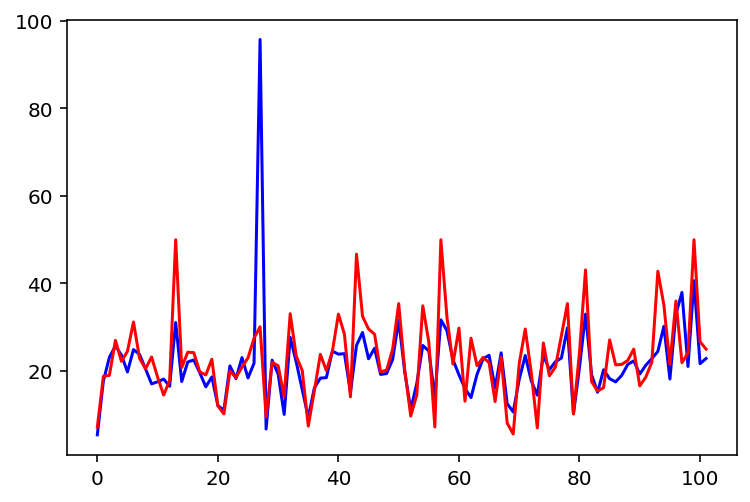

In [57]:
import matplotlib.pyplot as plt
plt.plot(y_pred, c='b')
plt.plot(y_test, c='r')

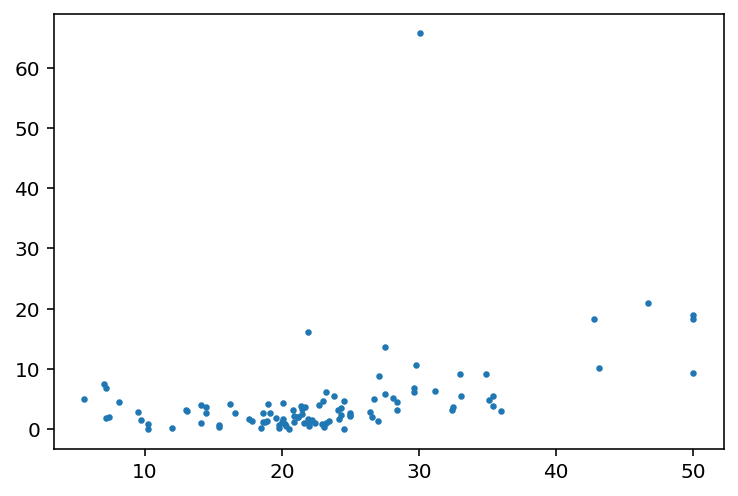

In [60]:
plt.scatter(y_test, np.abs(y_test-y_pred), s=5)

In [64]:
history.history.keys()

dict_keys(['loss'])

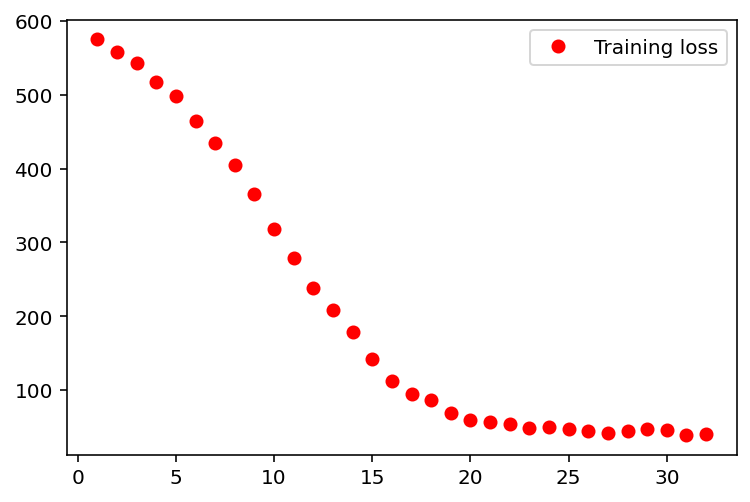

In [62]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()